sigma= 1.0
Will take 699 time steps of size k = 0.001


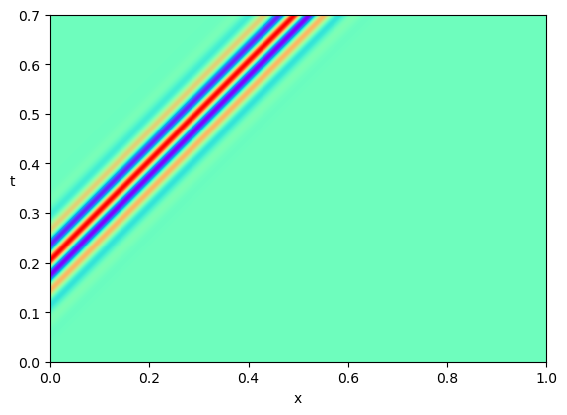

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#%matplotlib notebook

Tjiggle = 0.2
c = 1.0
sigma = 1.000
print('sigma=',sigma)
sigmasq = sigma**2

L = 1.
M = 1000
h = L/M  # spatial grid spacing

T = 0.7 
k = sigma*h/c  # time step
N = int(T/k)
print('Will take',N,'time steps of size k =', k)

m = M - 1

def l(t): return np.exp(-(t-Tjiggle)**2/2/(0.25*Tjiggle)**2)*(np.sin(100*t))#+0.3*sin(1500*t))  # jiggle left end for a little while  # add high-frequeny component to see numerical dispersion
def r(t): return 0*t
def f(x): return 0*x
def g(x): return 0*x

x = np.linspace(0,L,M+1)
t = k*np.arange(N+1)    # t-values on the grid

w = np.zeros((N+1,M+1)) # array for entire space-time grid

# write in the boundary conditions
w[:,0]  = l(t)
w[:,-1] = r(t)

# write in the initial displacement
w[0,:] = f(x)  

# first step different from the rest
w[1,1:-1] = w[0,1:-1] + k*g(x[1:-1]) + sigmasq/2*( w[0,:-2] - 2*w[0,1:-1] + w[0,2:] )  # account for initial velocity, g(x)

# main loop
for j in range(1,N):

    w[j+1,1:-1] = 2*w[j,1:-1] - w[j-1,1:-1] + sigmasq*( w[j,:-2] - 2*w[j,1:-1] + w[j,2:] )

    if abs(w[j+1,:]).max() > 3: break  # in case it blows up

plt.figure()
plt.imshow(np.flipud(w[:j+1,:]),interpolation='nearest',cmap='rainbow',extent=(0,L,0,T))  # flip for time increasing upwards
plt.xlabel('x'); plt.ylabel('t',rotation=0)
plt.imsave( "538_s22_wave.png",np.flipud(w[:j+1,:]),cmap='rainbow' )
